In [24]:
import pandas as pd
import numpy as np


def cargaAlcaldes(archivo, columna, fila, cabecera, nombreHoja):
    return pd.read_excel(archivo, sheet_name=nombreHoja,
         names=cabecera, usecols=columna, skiprows=fila)

directorio = 'C:/Users/david/Desktop/alcaldes/'

archivos = [
    [directorio + 'Alcaldes_Mandato_1979_1983.xlsx', 'D:K', 8, 
        ['CCAA', 'PROVINCIA', 'MUNICIPIO', 'CODIGO_INE', 'NOME','LISTA','FECHA_POS','FECHA_BAJA'], 'Alcaldes 1979-1983'],
    [directorio + 'Alcaldes_Mandato_1983_1987.xlsx', 'D:K', 8, 
        ['CCAA', 'PROVINCIA', 'MUNICIPIO', 'CODIGO_INE', 'NOME','LISTA','FECHA_POS','FECHA_BAJA'], 'Alcaldes 1983-1987'],
    [directorio + 'Alcaldes_Mandato_1987_1991.xlsx', 'D:K', 8, 
        ['CCAA', 'PROVINCIA', 'MUNICIPIO', 'CODIGO_INE', 'NOME','LISTA','FECHA_POS','FECHA_BAJA'], 'Alcaldes 1987-1991'],
    [directorio + 'Alcaldes_Mandato_1991_1995.xlsx', 'D:K', 8, 
        ['CCAA', 'PROVINCIA', 'MUNICIPIO', 'CODIGO_INE', 'NOME','LISTA','FECHA_POS','FECHA_BAJA'], 'Alcaldes 1991-1995'],
    [directorio + 'Alcaldes_Mandato_1995_1999.xlsx', 'D:K', 8, 
        ['CCAA', 'PROVINCIA', 'MUNICIPIO', 'CODIGO_INE', 'NOME','LISTA','FECHA_POS','FECHA_BAJA'], 'Alcaldes 1995-1999'],
    [directorio + 'Alcaldes_Mandato_1999_2003.xlsx', 'D:K', 8, 
        ['CCAA', 'PROVINCIA', 'MUNICIPIO', 'CODIGO_INE', 'NOME','LISTA','FECHA_POS','FECHA_BAJA'], 'Alcaldes 1999-2003'],
    [directorio + 'Alcaldes_Mandato_2003_2007.xlsx', 'D:K', 8, 
        ['CCAA', 'PROVINCIA', 'MUNICIPIO', 'CODIGO_INE', 'NOME','LISTA','FECHA_POS','FECHA_BAJA'], 'Alcaldes 2003-2007'],
    [directorio + 'Alcaldes_Mandato_2007_2011.xlsx', 'D:K', 8, 
        ['CCAA', 'PROVINCIA', 'MUNICIPIO', 'CODIGO_INE', 'NOME','LISTA','FECHA_POS','FECHA_BAJA'], 'Alcaldes 2007-2011'],
    [directorio + 'Alcaldes_Mandato_2011_2015.xlsx', 'D:K', 8, 
        ['CCAA', 'PROVINCIA', 'MUNICIPIO', 'CODIGO_INE', 'NOME','LISTA','FECHA_POS','FECHA_BAJA'], 'Alcaldes 2011-2015'],
    [directorio + 'Alcaldes_Mandato_2015_2019.xlsx', 'D:K', 8, 
        ['CCAA', 'PROVINCIA', 'MUNICIPIO', 'CODIGO_INE', 'NOME','LISTA','FECHA_POS','FECHA_BAJA'], 'Alcaldes 2015-2019'],
    [directorio + 'Alcaldes_Mandato_2019_2023.xlsx', 'D:K', 8, 
        ['CCAA', 'PROVINCIA', 'MUNICIPIO', 'CODIGO_INE', 'NOME','LISTA','FECHA_POS','FECHA_BAJA'], 'Alcaldes 2015-2019']
]

#Inicialización do dataframe vacío
dfAlcaldes = pd.DataFrame([])

for i in range(0, len(archivos)):
    dfAlcaldes = pd.concat([dfAlcaldes,
        cargaAlcaldes(archivos[i][0], archivos[i][1], 
            archivos[i][2], archivos[i][3], archivos[i][4])]
    )


dfAlcaldes


,CCAA,PROVINCIA,MUNICIPIO,CODIGO_INE,NOME,LISTA,FECHA_POS,FECHA_BAJA
0,Andalucía,Almería,ABRUCENA,040025,"MARTINEZ LAO, JUAN",PSOE,1979-04-19 00:00:00,NaT
1,Andalucía,Almería,ADRA,040031,"SARMIENTO POSADA, PEDRO",OTROS,1979-04-19 00:00:00,NaT
2,Andalucía,Almería,ALBANCHEZ,040046,"MARTOS AYBAR, RAMON",UCD,1979-04-19 00:00:00,NaT
3,Andalucía,Almería,ALBOLODUY,040059,"BLANES PANIAGUA, MARIANO",UCD,1979-04-19 00:00:00,NaT
4,Andalucía,Almería,ALBOX,040062,"MIRAS CARRASCO, JOSE",UCD,1979-04-19 00:00:00,NaT
...,...,...,...,...,...,...,...,...
8758,"Rioja, La","Rioja, La",Viniegra de Abajo,261780,Juan Ignacio Martínez Fernández,PP,15/06/2019,NaN
8759,"Rioja, La","Rioja, La",Viniegra de Arriba,261793,Laura Crespi Lázaro,PP,15/06/2019,NaN
8760,"Rioja, La","Rioja, La",Zarratón,261807,Víctor Manuel Manso Ocio,PSOE,15/06/2019,NaN
8761,"Rioja, La","Rioja, La",Zarzosa,261814,José María Sáenz Blanco,PP,15/06/2019,NaN


# Normalizacion

In [25]:
from unidecode import unidecode
dfAlc_Normalizado=dfAlcaldes
def normalizar(cadena):
    dfAlc_Normalizado.replace(pd.NaT, np.nan, inplace=True)
    dfAlc_Normalizado[cadena]=dfAlcaldes[cadena].fillna('')
    dfAlc_Normalizado[cadena] = dfAlc_Normalizado[cadena].apply(unidecode).str.casefold().str.upper()
    return dfAlc_Normalizado
def normalizar_nombre(nombre):
    partes = nombre.split(', ')#SI TIENE COMA LEN 2
    if len(partes) == 2:
        apellido, nombre = partes
        return f"{nombre} {apellido}"
    else:
        return nombre
def normalizar_fecha(fecha):
        fecha=str(fecha).split(' ')[0]
        fecha2=fecha.split('-')
        if len(fecha2)==3:
             ano,mes,dia=fecha2
             return f'{dia}/{mes}/{ano}'
        else:
             return f'{fecha}'
        
normalizar('CCAA')
normalizar('PROVINCIA')
normalizar('MUNICIPIO')
normalizar('NOME')
normalizar('LISTA')
dfAlc_Normalizado['NOME'] = dfAlc_Normalizado['NOME'].apply(normalizar_nombre)
dfAlc_Normalizado['CCAA'] = dfAlc_Normalizado['CCAA'].apply(normalizar_nombre)
dfAlc_Normalizado['PROVINCIA'] = dfAlc_Normalizado['PROVINCIA'].apply(normalizar_nombre)
dfAlc_Normalizado['MUNICIPIO'] = dfAlc_Normalizado['MUNICIPIO'].apply(normalizar_nombre)
dfAlc_Normalizado['FECHA_POS'] = dfAlc_Normalizado['FECHA_POS'].apply(normalizar_fecha)
dfAlc_Normalizado['FECHA_POS'] = pd.to_datetime(dfAlc_Normalizado['FECHA_POS'],format='%d/%m/%Y', errors='coerce')# el parámetro errors='coerce' remplaza los valores no convertibles con NaT 
dfAlc_Normalizado['FECHA_BAJA'] = pd.to_datetime(dfAlc_Normalizado['FECHA_BAJA'],format='%d/%m/%Y', errors='coerce')# el parámetro errors='coerce' remplaza los valores no convertibles con NaT 


dfAlcaldes=dfAlc_Normalizado
dfAlcaldes

,CCAA,PROVINCIA,MUNICIPIO,CODIGO_INE,NOME,LISTA,FECHA_POS,FECHA_BAJA
0,ANDALUCIA,ALMERIA,ABRUCENA,040025,JUAN MARTINEZ LAO,PSOE,1979-04-19,NaT
1,ANDALUCIA,ALMERIA,ADRA,040031,PEDRO SARMIENTO POSADA,OTROS,1979-04-19,NaT
2,ANDALUCIA,ALMERIA,ALBANCHEZ,040046,RAMON MARTOS AYBAR,UCD,1979-04-19,NaT
3,ANDALUCIA,ALMERIA,ALBOLODUY,040059,MARIANO BLANES PANIAGUA,UCD,1979-04-19,NaT
4,ANDALUCIA,ALMERIA,ALBOX,040062,JOSE MIRAS CARRASCO,UCD,1979-04-19,NaT
...,...,...,...,...,...,...,...,...
8758,LA RIOJA,LA RIOJA,VINIEGRA DE ABAJO,261780,JUAN IGNACIO MARTINEZ FERNANDEZ,PP,2019-06-15,NaT
8759,LA RIOJA,LA RIOJA,VINIEGRA DE ARRIBA,261793,LAURA CRESPI LAZARO,PP,2019-06-15,NaT
8760,LA RIOJA,LA RIOJA,ZARRATON,261807,VICTOR MANUEL MANSO OCIO,PSOE,2019-06-15,NaT
8761,LA RIOJA,LA RIOJA,ZARZOSA,261814,JOSE MARIA SAENZ BLANCO,PP,2019-06-15,NaT


In [26]:
def graficaCandidaturas(dfEjemplo,numero_partidos):
    dfEjemplo=dfEjemplo.sort_values(ascending=False)
    dfEjemplo = dfEjemplo.head(numero_partidos)
    # Crea el gráfico de barras
    dfEjemplo.plot(kind='bar', color='orange', alpha=0.8)
    plt.xlabel('Partido')
    plt.ylabel('Candidaturas')
    plt.xticks(rotation=90, ha="right")
    plt.tight_layout()
    plt.show()

# Mas votados en la historia

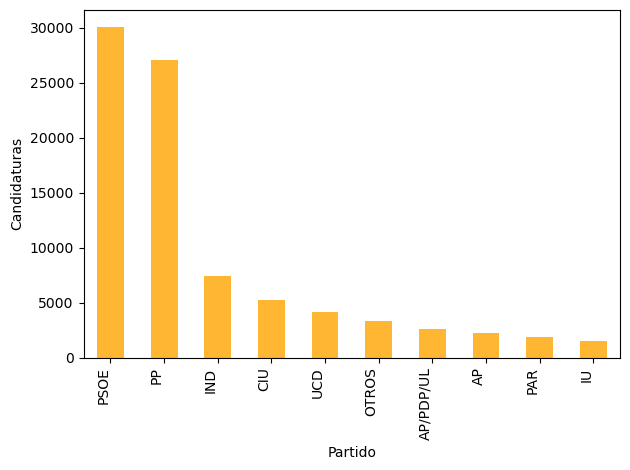

In [31]:
#partidos mas votados en la historia de la democracia
import matplotlib.pyplot as plt

# Agrupa por partido y cuenta la cantidad de listas
conteo_partidos = dfAlcaldes.groupby('LISTA')['LISTA'].count()

graficaCandidaturas(conteo_partidos,10)



# Partido mais repetido en Lalín

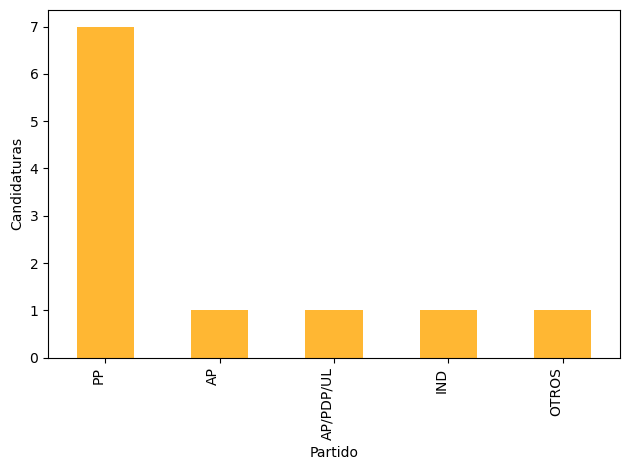

In [28]:
#partidos mas votados de galicia
resultadosLalin = dfAlcaldes.loc[dfAlcaldes['MUNICIPIO'] == 'LALIN']

# Realiza el conteo y agrupación por 'LISTA'
resultadosLalin = resultadosLalin.groupby('LISTA')['LISTA'].count()
graficaCandidaturas(resultadosLalin,5)


### Columna de Ano

In [39]:
resultadosGalicia = dfAlcaldes.loc[dfAlcaldes['CCAA'] == 'GALICIA']
resultadosGalicia['AÑO_POS'] = resultadosGalicia['FECHA_POS'].dt.year
resultadosGalicia['AÑO_BAJA'] = resultadosGalicia['FECHA_BAJA'].dt.year
resultadosGalicia




C:\Users\david\AppData\Local\Temp\ipykernel_5528\3258291608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultadosGalicia['AÑO_POS'] = resultadosGalicia['FECHA_POS'].dt.year
C:\Users\david\AppData\Local\Temp\ipykernel_5528\3258291608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultadosGalicia['AÑO_BAJA'] = resultadosGalicia['FECHA_BAJA'].dt.year


,CCAA,PROVINCIA,MUNICIPIO,CODIGO_INE,NOME,LISTA,FECHA_POS,FECHA_BAJA,AÑO_POS,AÑO_BAJA
7205,GALICIA,A CORUNA,ABEGONDO,150011,MIGUEL PATINO VAZQUEZ,UCD,1979-04-19,NaT,1979,NaN
7206,GALICIA,A CORUNA,AMES,150026,JOSE ASTRAY LORENZO,IND,1979-04-19,NaT,1979,NaN
7207,GALICIA,A CORUNA,ARANGA,150032,JOSE LUIS DAFONTE CABANAS,CD,1979-04-19,NaT,1979,NaN
7208,GALICIA,A CORUNA,ARES,150047,JOSE CORTINAS GIL,PSOE,1979-04-19,NaT,1979,NaN
7209,GALICIA,A CORUNA,ARTEIXO,150050,ERNESTO PAMPIN GONTAN,UCD,1979-04-19,NaT,1979,NaN
...,...,...,...,...,...,...,...,...,...,...
7741,GALICIA,PONTEVEDRA,VILA DE CRUCES,360596,LUIS CELSO TABOADA SANCHEZ,OTROS,2019-06-15,NaT,2019,NaN
7742,GALICIA,PONTEVEDRA,VILABOA,360583,FRANCISCO COSTA FERNANDEZ,PSOE,2019-06-15,2020-08-07,2019,2020.0
7743,GALICIA,PONTEVEDRA,VILABOA,360583,CESAR POZA GONZALEZ,PSOE,2020-08-20,NaT,2020,NaN
7744,GALICIA,PONTEVEDRA,VILAGARCIA DE AROUSA,360600,ALBERTO VARELA PAZ,PSOE,2019-06-15,NaT,2019,NaN


# Duración do presidente segundo o partido

In [56]:
resultadosGalicia['DURACION']=resultadosGalicia['AÑO_BAJA'].fillna(resultadosGalicia['AÑO_POS']) - resultadosGalicia['AÑO_POS']
resultadosGalicia['DURACION'] = resultadosGalicia.groupby('NOME')['NOME'].transform('count')
resultadosGalicia['DURACION'].max()





C:\Users\david\AppData\Local\Temp\ipykernel_5528\1911327425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultadosGalicia['DURACION']=resultadosGalicia['AÑO_BAJA'].fillna(resultadosGalicia['AÑO_POS']) - resultadosGalicia['AÑO_POS']
C:\Users\david\AppData\Local\Temp\ipykernel_5528\1911327425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultadosGalicia['DURACION'] = resultadosGalicia.groupby('NOME')['NOME'].transform('count')


11

# Media de candidaturas por lista

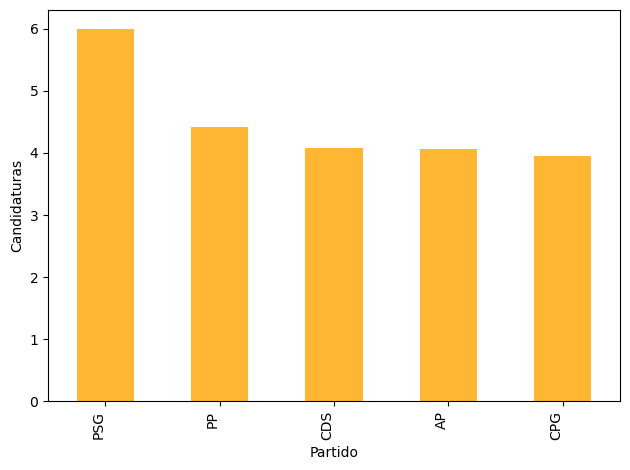

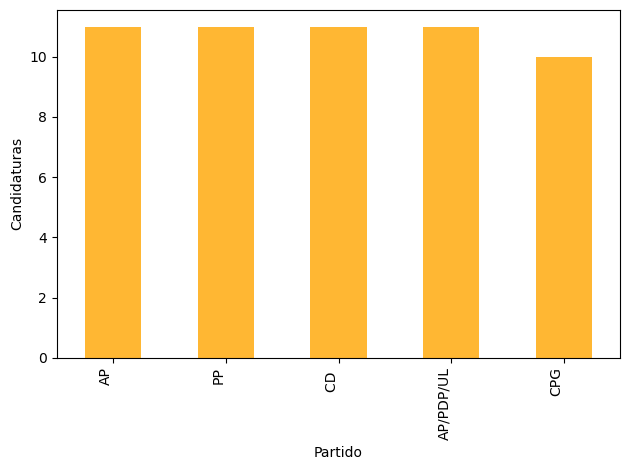

In [54]:
#media de candidaturas segun la lista 
graficaGalicia= resultadosGalicia.groupby('LISTA')['DURACION'].mean()
graficaCandidaturas(graficaGalicia,5)
#maximo de candidaturas
graficaGalicia= resultadosGalicia.groupby('LISTA')['DURACION'].max()
graficaCandidaturas(graficaGalicia,5)
